<a href="https://colab.research.google.com/github/aahiljivani/small_datasets/blob/main/Predicting_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Load Data
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the csv file
file_path = "diabetes.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path,

)


/tmp/ipython-input-2-2549035470.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Seperate fetures from targets into numpy array
targets = df.iloc[:,-1]
targets = np.array(targets)
type(targets)

numpy.ndarray

In [5]:
# Seperate fetures from targets into numpy array

features = df.iloc[:,0:8]
features = np.array(features)
type(features)

numpy.ndarray

In [6]:
# split data into training and test sets, check shape
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.33)
n,d = x_train.shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((514, 8), (254, 8), (514,), (254,))

In [7]:
# Scale features for effective model parameters
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
# Change the train test sets from numpy to tensors

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [9]:
# intialize the model

model = nn.Sequential(
              nn.Linear(d,16),
              nn.ReLU(),
              nn.Linear(16,1),
              nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

train_losses = []
test_losses = []



In [10]:
# Run model
epochs = 400
for epoch in range(epochs):
  # Zero Gradients to prevent summation
  optimizer.zero_grad()

  # Forward Pass
  output = model(x_train)
  loss = loss_fn(output,y_train)

  # Backpropogration
  loss.backward()
  optimizer.step()

  # Record Losses
  train_losses.append(loss.item())

# Run Model on test set to check over-fitting
  test_output = model(x_test)
  test_loss = loss_fn(test_output,y_test)

  test_losses.append(test_loss.item())


# Print every 50 iterations to check model performance

  if (epoch + 1) % 50 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


Epoch [50/400], Train Loss: 0.6627, Test Loss: 0.6711
Epoch [100/400], Train Loss: 0.5951, Test Loss: 0.5988
Epoch [150/400], Train Loss: 0.5401, Test Loss: 0.5423
Epoch [200/400], Train Loss: 0.5008, Test Loss: 0.5049
Epoch [250/400], Train Loss: 0.4763, Test Loss: 0.4841
Epoch [300/400], Train Loss: 0.4608, Test Loss: 0.4740
Epoch [350/400], Train Loss: 0.4510, Test Loss: 0.4697
Epoch [400/400], Train Loss: 0.4446, Test Loss: 0.4686


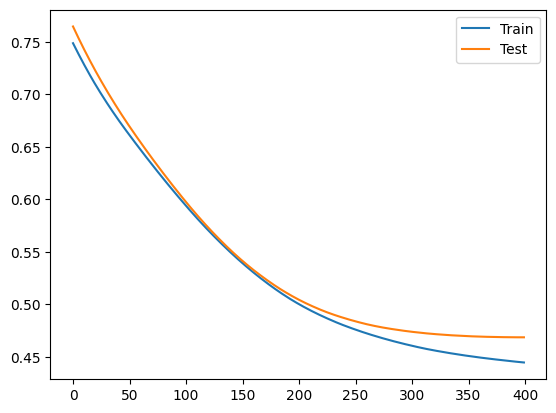

In [11]:
# Plot losses of both test and train set

plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.legend()
plt.show()

In [12]:
# print accuracy of both test and train sets

with torch.no_grad():
  train_output = model(x_train)
  train_output = (train_output > 0.5).float()
  train_acc = accuracy_score(y_train, train_output)
  print(f'Train Accuracy: {train_acc}')

  test_output = model(x_test)
  test_output = (test_output > 0.5).float()
  test_acc = accuracy_score(y_test, test_output)
  print(f'Test Accuracy: {test_acc}')

Train Accuracy: 0.7821011673151751
Test Accuracy: 0.7874015748031497
